#Support Vector Regression

## Data Pre Processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
y=y.reshape((len(y),1))
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
# split to test and training data is skipped as we are considering the whole data set for training the model

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X = scX.fit_transform(X)

scY = StandardScaler()
y = scY.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR Model

In [ ]:
from sklearn.svm import SVR
regresor = SVR(kernel='rbf')

regresor.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting new result

In [ ]:

scY.inverse_transform(regresor.predict(scX.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

## Plotting the Support vector regression model

In [ ]:
# y_predicted = scY.inverse_transform()
y_predicted = scY.inverse_transform(regresor.predict(X).reshape((len(X), 1)))

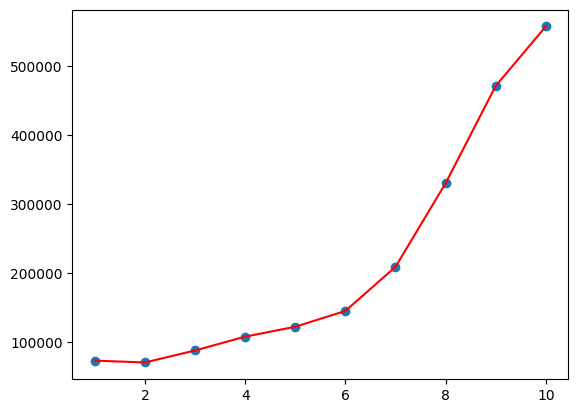

In [ ]:
plt.scatter(scX.inverse_transform(X), y_predicted)
plt.plot(scX.inverse_transform(X), y_predicted, color='red')

plt.show()

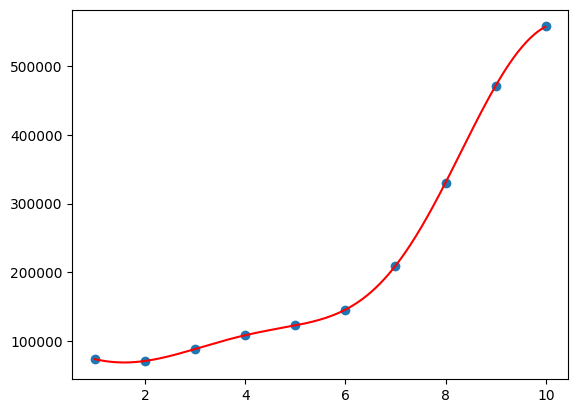

In [ ]:
X_smooth = np.arange(min(X), max(X), step=0.01).reshape(-1, 1)
y_predicted_smooth = scY.inverse_transform(regresor.predict(X_smooth).reshape((len(X_smooth), 1)))
plt.scatter(scX.inverse_transform(X), y_predicted)
plt.plot(scX.inverse_transform(X_smooth), y_predicted_smooth, color='red')

plt.show()